<a href="https://colab.research.google.com/github/KshitijMShah/Projectile_Air_Resistance-/blob/main/Projectile_Motion_with_Air_Friction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

from sympy import*
import sympy as sp

from sympy.interactive import printing
printing.init_printing(use_latex = True)

import matplotlib.pyplot  as plt

The net force for moving with air friction under gravity is 


 $\vec{F_{net}} = \vec{F_{g}} + \vec{F_{f}} = -mg\hat{y} \ - b \mid \vec{\nu} \mid \vec{\nu} $


and noting that $\vec{v} = \dot{x} \hat{x} + \dot{y} \hat{y}$



or in vector form 

$\vec{F_{net}} = \begin{bmatrix}
-b\dot{x}\sqrt{\dot{x}^{2} \ +\ \dot{y}^{2}}\\
-mg\ -b\dot{y}\sqrt{\dot{x}^{2} +\dot{y}^{2}}
\end{bmatrix}$


Using the fact 


$\vec{F}_{net} = m \vec{a} = m \langle \ddot{x} \ddot{y}\rangle$


$m \begin{bmatrix}\ddot{x} \\ \ddot{y} \end{bmatrix} = \begin{bmatrix}
-b\dot{x}\sqrt{\dot{x}^{2} \ +\ \dot{y}^{2}}\\
-mg\ -b\dot{y}\sqrt{\dot{x}^{2} +\dot{y}^{2}}
\end{bmatrix}$


and thus have two coupled differential equations 

$\ddot{x} = - \frac{b}{m} \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}$ 


$\ddot{y} = -g - \frac{b}{m} \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2}$


Defining $x' = \frac{x}{g} $ and $y' = \frac{y}{g} $ we get


$\ddot{x'} = -\frac{bg}{m} \dot{x'}\sqrt{\dot{x'}^2 + \dot{y'}^2}$ 

 
$\ddot{y'} = -1 - \frac{bg}{m} \dot{y'} \sqrt{\dot{x'}^2 + \dot{y'}^2}$

In python we can only solve ODEs, so defining $v_x = \dot{x}$ and $v_y = \dot{y}$ we get a system of 4 coupled first order ODEs

* $\dot{x} = v_x$
* $\dot{y} = v_y$
* $\dot{v_x} = -\textbf{B}\dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}$
* $\dot{v_y} = -1 - \textbf{B}\dot{y} \sqrt{\dot{x}^2 + \dot{y}^2}$


Where $\textbf{B} = \frac{bg}{m}$

Define $\vec{S} = \langle x, v_x, y, v_y \rangle$. To solve ODEs in python, we need to write a fucntion that takes $\vec{S}$ and time t, and returns $d\vec{S}/dt$. In other words we want $f$ in  


<h2><center>$ \frac{d\vec{S}}{dt} = f(\vec{S}, t) $ </center></h2>



In [ ]:
#Define function f above

def dsdt(t, S, B):
  x, vx, y, vy = S
  return [vx, -B*np.sqrt(vx**2+vy**2)*vx, vy, -1-B*np.sqrt(vx**2+vy**2)*vy]

In [ ]:
 B = 10
 V = 1
 t1 = 40*np.pi / 180
 t2 = 45 * np.pi /180 
 t3 = 50 * np.pi / 180 

Solve the ODE using scipy- The fucntion takes in $d\vec{S}/dt$ function, time period to solve over [0, 2] seconds, initial conditions, and additional arguments B(friction force) for the fucntion

In [ ]:
sol1 = solve_ivp(dsdt, [0, 2], y0=[0,V*np.cos(t1),0,V*np.sin(t1)], t_eval=np.linspace(0,2,1000), args=(B,))
sol2 = solve_ivp(dsdt, [0, 2], y0=[0,V*np.cos(t2),0,V*np.sin(t2)], t_eval=np.linspace(0,2,1000), args=(B,))
sol3 = solve_ivp(dsdt, [0, 2], y0=[0,V*np.cos(t3),0,V*np.sin(t3)], t_eval=np.linspace(0,2,1000), args=(B,))

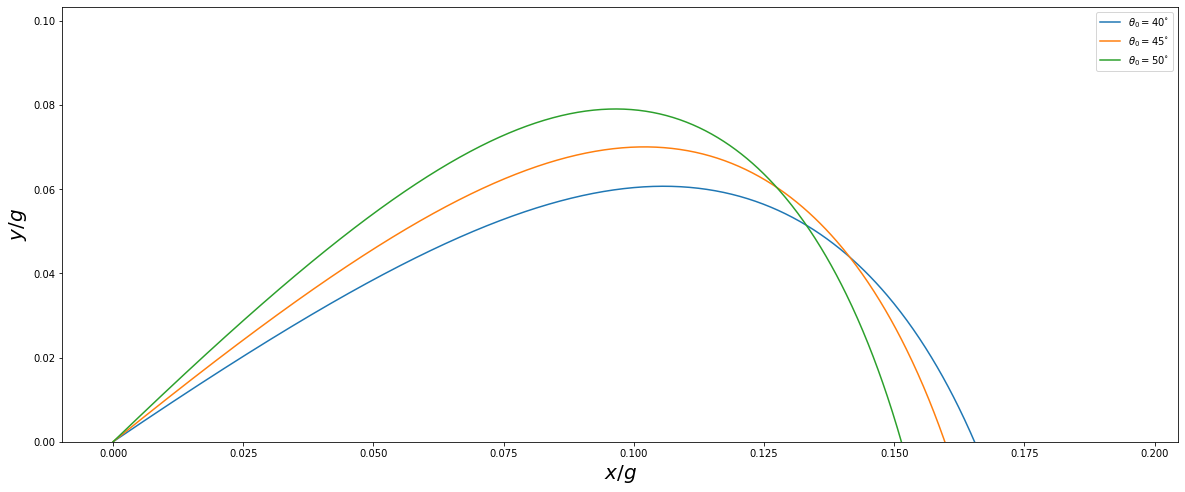

In [ ]:
#sol1.y is the list of all the solution to the diffrential equation 
#not to be confused with the y we 

plt.figure(figsize=(20,8))
plt.plot(sol1.y[0],sol1.y[2], label=r'$\theta_0=40^{\circ}$')
plt.plot(sol2.y[0],sol2.y[2], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0],sol3.y[2], label=r'$\theta_0=50^{\circ}$')
plt.ylim(bottom = 0)
plt.legend()
plt.xlabel('$x/g$', fontsize = 20)
plt.ylabel('$y/g$', fontsize = 20)
plt.show()

In [ ]:
def get_distance(angle, B= 0, V= 1, t= 2):
  v0x = V*np.cos(angle*np.pi/180)
  v0y = V*np.sin(angle*np.pi/180)
  sol = solve_ivp(dsdt, [0, t], y0=[0,v0x,0,v0y], t_eval=np.linspace(0,t,10000), args=(B,), atol=1e-7, rtol=1e-4)
  just_above_idx = np.where(np.diff(np.sign(sol.y[2])) < 0)[0][0]
  just_below_idx = just_above_idx + 1

  x_loc = (sol.y[0][just_above_idx] + sol.y[0][just_below_idx])/2
  return x_loc
  

In [ ]:
print(f'Launch angel 45 degrees distance travelled: {get_distance(45, B=0, V=1)}')
print(f'Launch angel 40 degrees distance travelled: {get_distance(40, B=0, V=1)}')

Launch angel 45 degrees distance travelled: 1.0000197012460217
Launch angel 40 degrees distance travelled: 0.9848486164910958


In [ ]:
angles = np.linspace(0, 90, 200)
x_locs = np.vectorize(get_distance)(angles, B= 1000, V= 1)

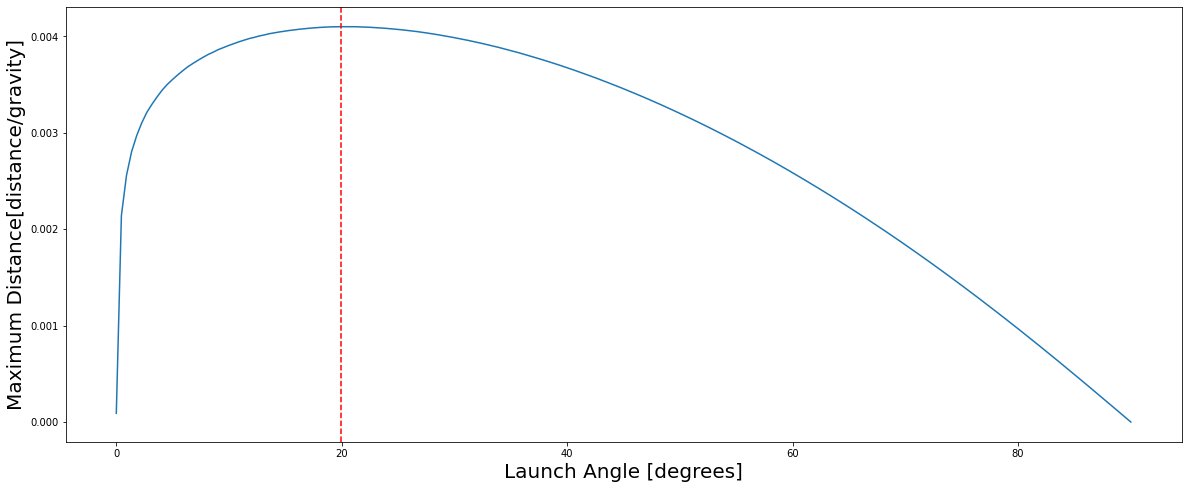

19.899497487437188


In [ ]:
plt.figure(figsize=(20,8))
plt.plot(angles, x_locs)
plt.xlabel('Launch Angle [degrees]', fontsize = 20)
plt.ylabel('Maximum Distance[distance/gravity]', fontsize = 20)
plt.axvline(angles[np.argmax(x_locs)], ls = '--', color = 'r')
plt.show()
print("Optimal Launch angle", angles[np.argmax(x_locs)])

In [ ]:
V1 = 1
V2 = 20
angles = np.linspace(35, 45, 200)
Bs =  np.linspace(0, 1, 50)

results_v1 = [np.vectorize(get_distance)(angles, B=B, V=V1) for B in Bs]
opt_angles_v1 = [angles[np.argmax(result)] for result in results_v1]
results_v2 = [np.vectorize(get_distance)(angles, B=B, V=V2, t=6) for B in Bs]
opt_angles_v2 = [angles[np.argmax(result)] for result in results_v2]

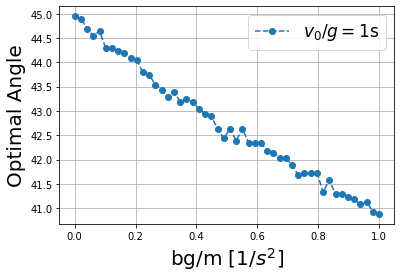

In [ ]:
plt.plot(Bs, opt_angles_v1, 'o--', label='$v_0/g=1$s')
#plt.plot(Bs, opt_angles_v2, 'o--', label='$v_0/g=2$s')
plt.legend(fontsize=17)
plt.xlabel('bg/m [1/$s^2$]', fontsize=20)
plt.ylabel('Optimal Angle', fontsize=20)
plt.grid()
